The data set used can be obtained from: https://www.kaggle.com/uciml/glass

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('/content/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


-- 1 buildingwindowsfloatprocessed -- 2 buildingwindowsnonfloatprocessed -- 3 vehiclewindowsfloatprocessed
-- 4 vehiclewindowsnonfloatprocessed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

In [4]:
#understanding the staticstics of each numerical column
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
#Getting the various columns and their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


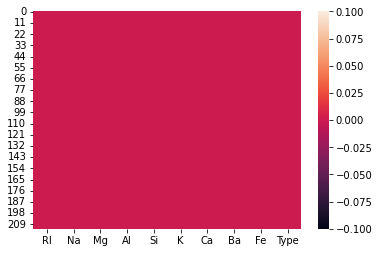

In [6]:
#Visualization of whether the dataset has null values or not
sns.heatmap(df.isnull())

In [7]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [11]:
col=list(df.columns)
col=col[1:9]
col

['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

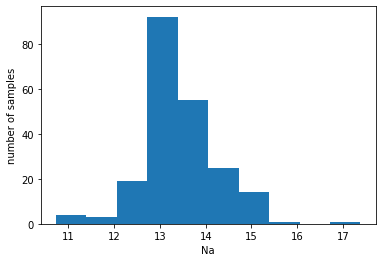

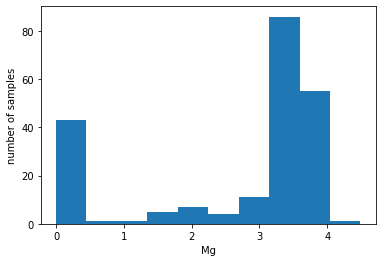

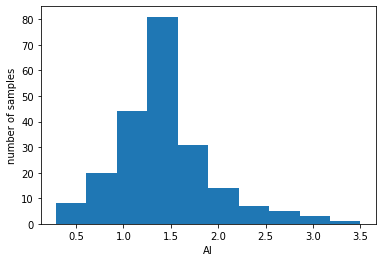

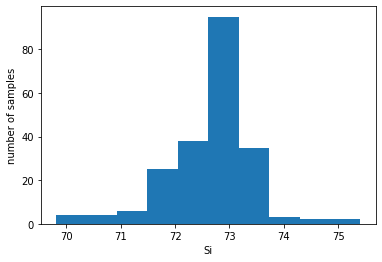

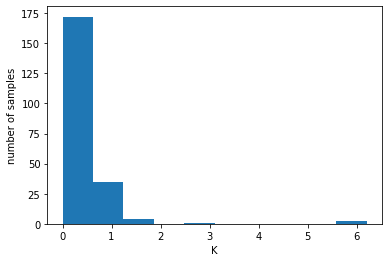

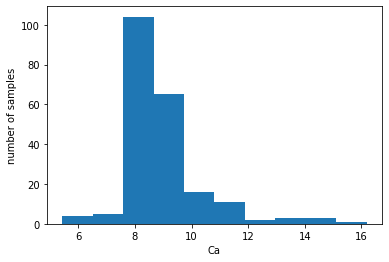

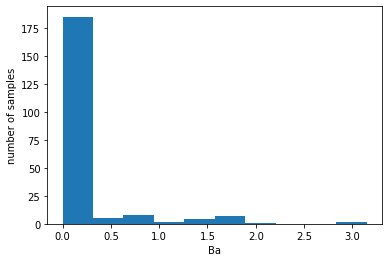

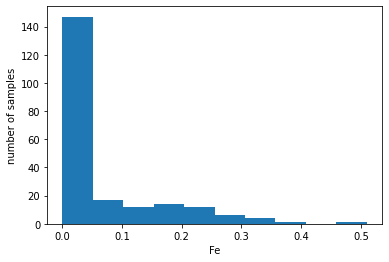

In [17]:
#no of samples of each element
for c in col:

  plt.hist(df[c])
  plt.xticks()
  plt.xlabel(c)
  plt.ylabel('number of samples')
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


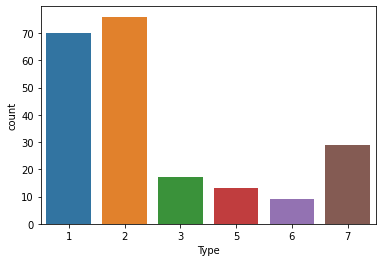

In [18]:
sns.countplot(df['Type'])

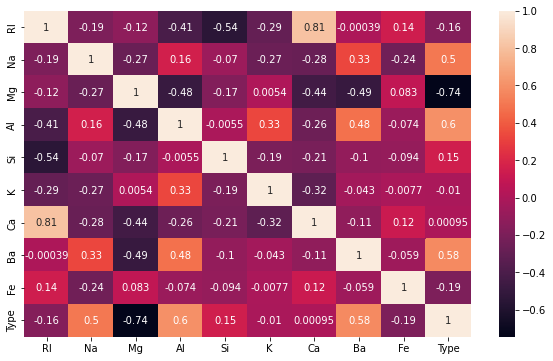

In [21]:
# corelation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

No handles with labels found to put in legend.


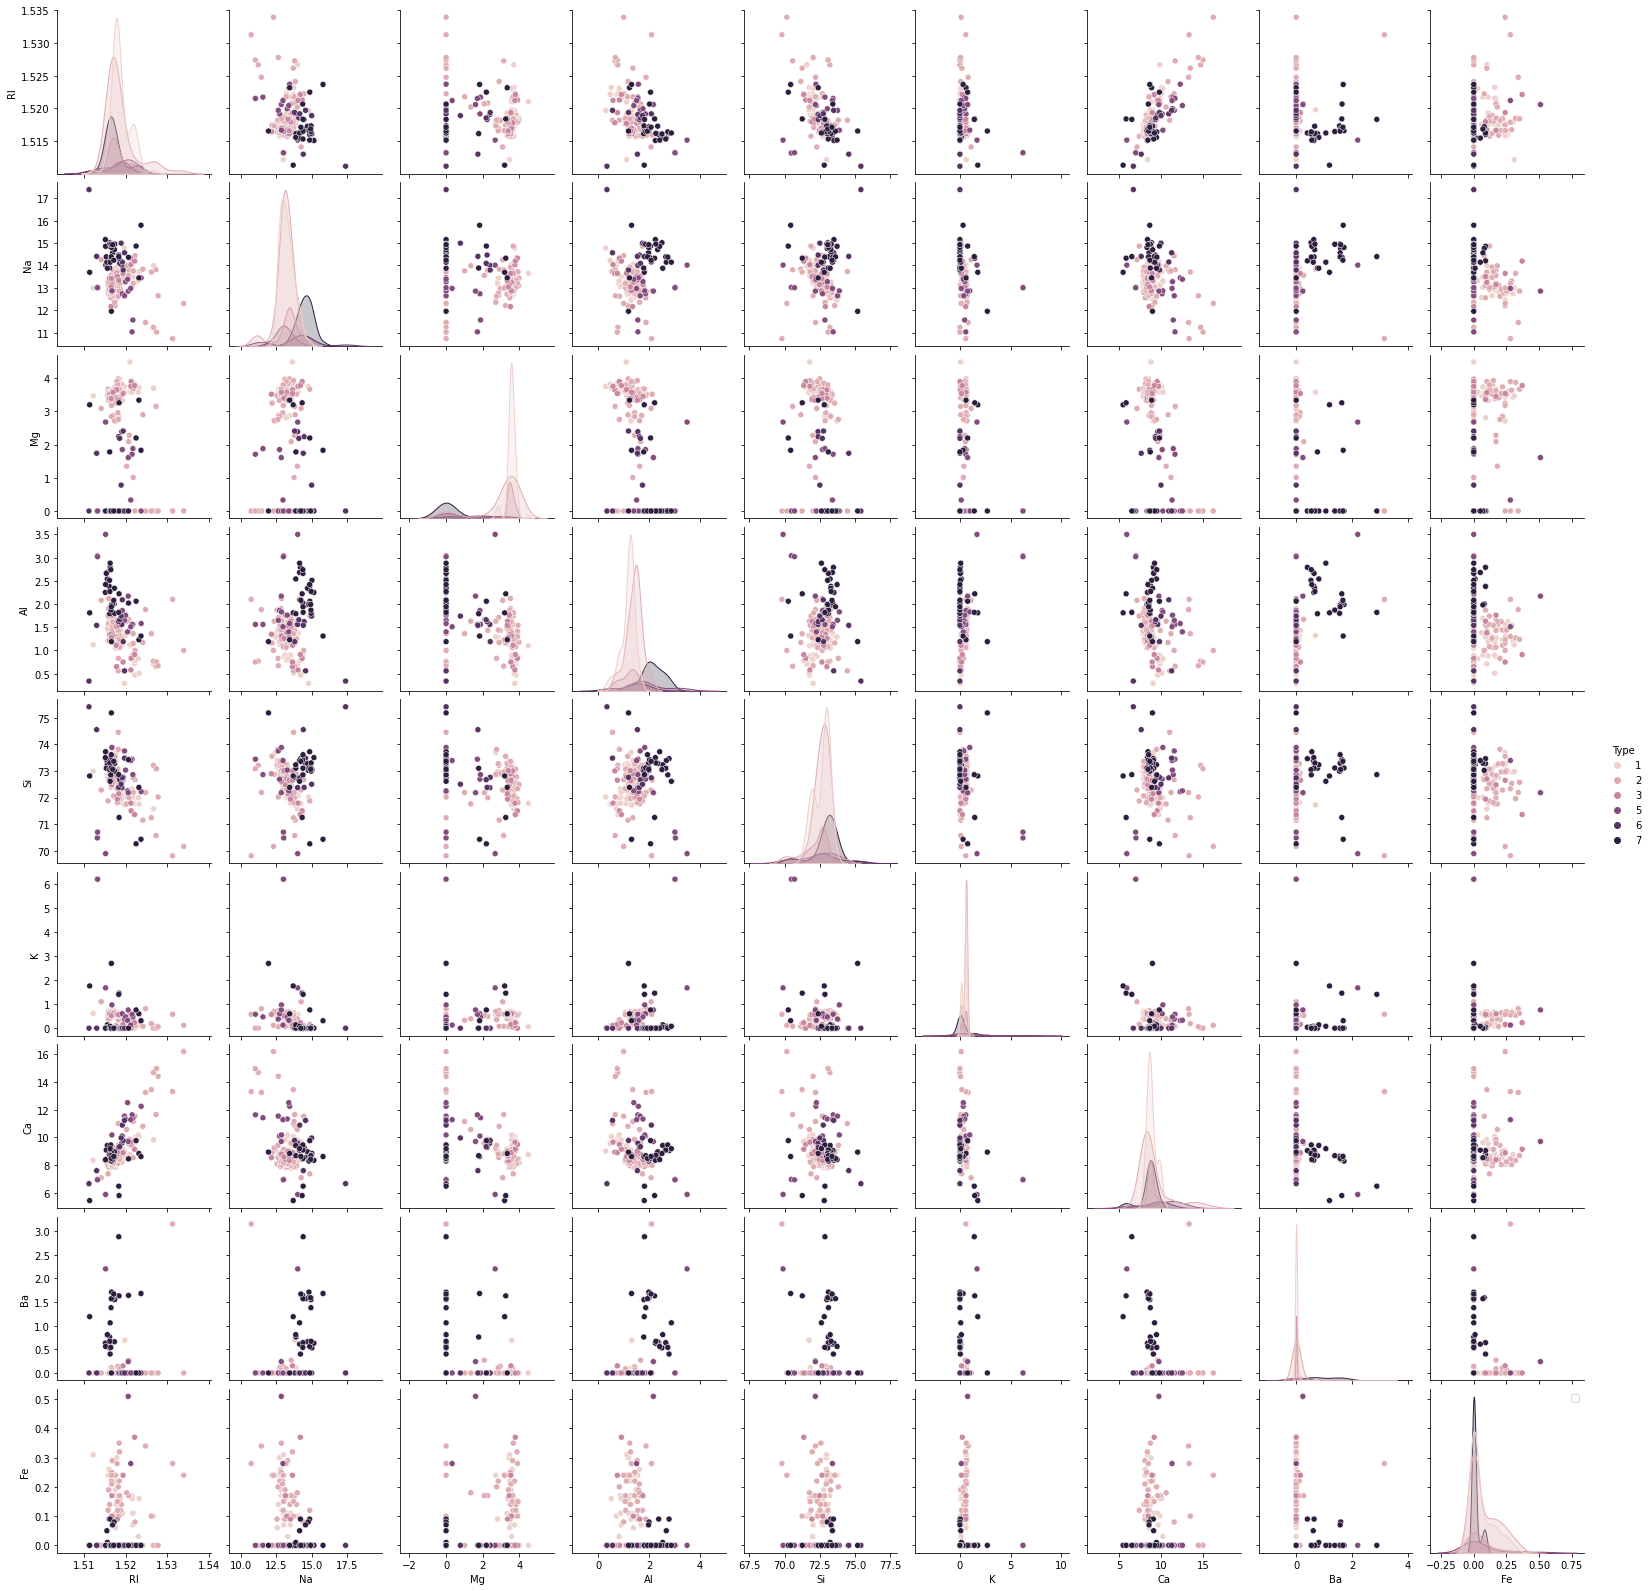

In [22]:
#distribution of target is distributed among variables
sns.pairplot(df,hue='Type')
plt.legend()
plt.show()

In [23]:
df.mean()

RI       1.518365
Na      13.407850
Mg       2.684533
Al       1.444907
Si      72.650935
K        0.497056
Ca       8.956963
Ba       0.175047
Fe       0.057009
Type     2.780374
dtype: float64

In [24]:
df.median()

RI       1.51768
Na      13.30000
Mg       3.48000
Al       1.36000
Si      72.79000
K        0.55500
Ca       8.60000
Ba       0.00000
Fe       0.00000
Type     2.00000
dtype: float64

In [25]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [26]:
df.kurtosis()

RI       4.931737
Na       3.052232
Mg      -0.410319
Al       2.060569
Si       2.967903
K       54.689699
Ca       6.681978
Ba      12.541084
Fe       2.662016
Type    -0.279518
dtype: float64

In [27]:
X=df.drop('Type',axis=1)

In [28]:
Y=df['Type']

In [30]:
#splitting data into train test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [31]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
#applying decsion tree with the default params
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [35]:
from sklearn import metrics

In [36]:
#evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5813953488372093


In [41]:
#using decsion tree with entropy as criterion and pruning the deciosn tree to max depth of 3
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [43]:
#evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6976744186046512


In [44]:
rfc=RandomForestClassifier()
rfc=rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [45]:
#evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7441860465116279


In [52]:
feature_imp = pd.Series(rfc.feature_importances_,index=df.columns[:9]).sort_values(ascending=False)
feature_imp

Al    0.168805
Mg    0.156913
RI    0.144265
Ca    0.121929
Ba    0.104696
Na    0.095683
K     0.088626
Si    0.075770
Fe    0.043313
dtype: float64

No handles with labels found to put in legend.


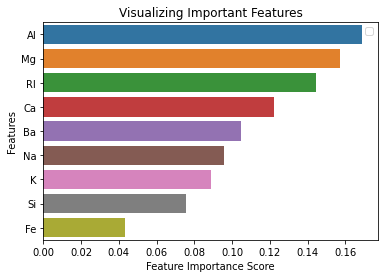

In [53]:
#visualizing important features
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [56]:
#Fe feature can be removed due its less importance among various features
X=df.drop('Fe',axis=1)
Y=df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [57]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [58]:
#creating random forest classifier after removing less important data
rfc2=RandomForestClassifier()
rfc2=rfc2.fit(X_train,y_train)
y_pred=rfc2.predict(X_test)

In [59]:
#evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


After removing the least imporrtant feature the accuracy has jumped from 74% to 100%

In [60]:
from sklearn.metrics import plot_confusion_matrix,classification_report
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)

              precision    recall  f1-score   support

           1       0.80      0.89      0.84        18
           2       0.50      0.60      0.55        10
           3       0.33      0.17      0.22         6
           5       1.00      0.75      0.86         4
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.70        43
   macro avg       0.72      0.68      0.68        43
weighted avg       0.69      0.70      0.68        43



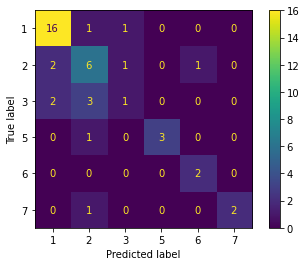

In [61]:
#the perfomance metrics after some hyperparameter tuning for decion tree
report(clf)

              precision    recall  f1-score   support

           1       0.80      0.89      0.84        18
           2       0.50      0.70      0.58        10
           3       1.00      0.33      0.50         6
           5       0.67      0.50      0.57         4
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3

    accuracy                           0.72        43
   macro avg       0.83      0.68      0.72        43
weighted avg       0.77      0.72      0.71        43



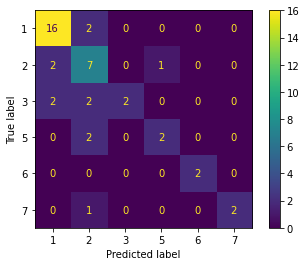

In [62]:
#the perfomance metrics for random forest classifier using default args and no removal of less significant feature
report(rfc)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



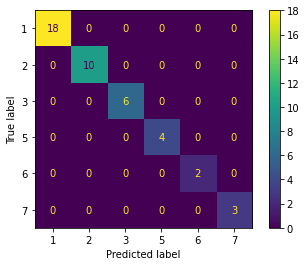

In [63]:
#the perfomance metrics after removing the least significant feature for random forest classifier
report(rfc2)

Thereby one could conclude that random forest classifer has better perfomance compared to decsion tree even after doing some tuning such as early pruning. But by removing the least signifucant feature from the data , random forest classifier has shown a massive imporvement showing that removing less significant feature can help in reoving misleading data and noise. So random forest classifier with removal of less significant features has the best perfomance